# Deep Learning Indonesia.AI
Pertemuan - 2 Review Support Vector Machine & Random Forest

# Importing Libraries

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris

plt.style.use('ggplot')

# Load Datasets

In [5]:
iris = load_iris()

## Explore Datasets

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Prepare Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = iris.data[:, :2]
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train Model

In [12]:
from sklearn.svm import SVC

In [13]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

# Evaluate Model

In [14]:
svm_score = svm_model.score(X_test, y_test)

In [17]:
print(f'Model Accuracy : {svm_score * 100:.2f}')

Model Accuracy : 77.78


# Visualize Results

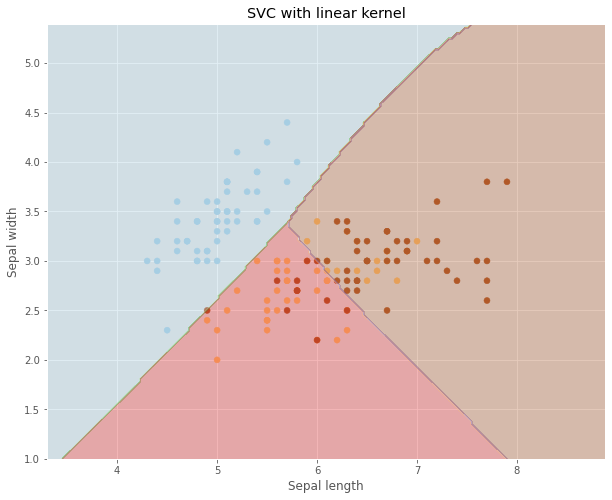

In [22]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

plt.subplot(1, 1, 1)
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.show()